This is a analysis of the data related to loan status.
The data set has been taken from  : https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv=

We will be performing analysis on the data and find out the deep insight through graphs. 

We will also be using SCIKIT learn and classifiers like KNeighbour, SVM, Decision Tree and logistic regression.

To calculate the output of our model we will be scoring it through accuracy_score, jaccard_similarity_score, f1_score, log_loss.

We will take a look into it via roc_curve and confusion matrix.


In [1]:
# we import the required libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
#download the dat aset
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv


--2019-02-03 15:48:30--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2019-02-03 15:48:30 (303 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [3]:
# to read the downloaded data
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
# the shape of he dataset
df.shape

(346, 10)

In [5]:
#convert to date time object : i.e if the date is in format dd/mm/yy or any other format then it wil convert to dd-mm-yy formate.
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


In [6]:
# data visualization and preprocessing
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [7]:
# notice: installing seaborn might takes a few minutes to download the seabornn visualization
!conda install -c anaconda seaborn -y

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment /opt/conda/envs/DSX-Python35:

The following packages will be UPDATED:

    seaborn: 0.8.0-py35h15a2772_0 --> 0.9.0-py35_0 anaconda

seaborn-0.9.0- 100% |################################| Time: 0:00:00   9.04 MB/s


In [8]:
# we import seaborn too for visualisation of the dataset
import seaborn as sns

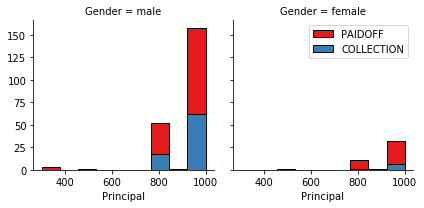

In [11]:
# thsi is graph for gender on principal value
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

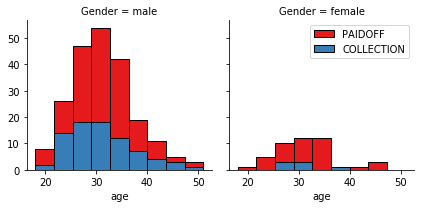

In [12]:
#this is for age vs gender..
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

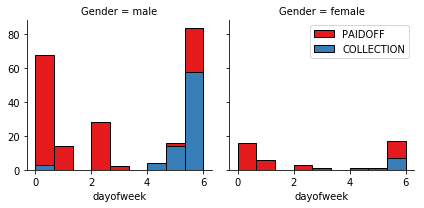

In [13]:
# this is for day of week vs gender..
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [14]:
#normalize the dataset
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [15]:
#to replca male with 0 and female with 1 to convert categorical to numerical
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4


In [16]:
#to normalize education and 
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [17]:
#getting data of specific columns
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [19]:
#one hot encoding by pd.get_dummies
Feature = df[['Principal','terms','age','Gender','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,0,3,0,1,0
1,1000,30,33,1,3,1,0,0
2,1000,15,27,0,3,0,0,1
3,1000,30,28,1,4,0,0,1
4,1000,30,29,0,4,0,0,1


In [20]:
X = Feature
X[0:5]
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [21]:
#normalize the data:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -0.26122054,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -0.26122054,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -0.26122054,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.12175534,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.12175534,
        -0.38170062, -0.87997669,  1.14984679]])

In [27]:
# data management
import pandas as pd
import numpy as np
# plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
from matplotlib.legend_handler import HandlerLine2D
import seaborn as sns
# interface to Graphviz’s dot language
!pip install pydotplus
import pydotplus
# function lib for creating efficient looping iterators 
import itertools
# sklearn
from sklearn import tree
from sklearn import preprocessing, metrics 
# accuracy and scoring
from sklearn.metrics import accuracy_score, jaccard_similarity_score, f1_score, log_loss 
# evaluations
from sklearn.metrics import roc_curve, auc, confusion_matrix 
from sklearn.externals.six import StringIO
# reporting
from sklearn.metrics import classification_report
#  algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
%matplotlib inline

    100% |████████████████████████████████| 286kB 3.8MB/s eta 0:00:01
Requirement not upgraded as not directly required: pyparsing>=2.0.1 in /opt/conda/envs/DSX-Python35/lib/python3.5/site-packages (from pydotplus)
  Running setup.py bdist_wheel for pydotplus ... done
  Stored in directory: /home/dsxuser/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [28]:
#defining the confusion matrix function
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


In [29]:
#downnloading the train data set
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv


--2019-02-03 16:13:04--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2019-02-03 16:13:04 (304 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [30]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [31]:
df.shape

(346, 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8f7e51358>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff8f7d7bb00>]], dtype=object)

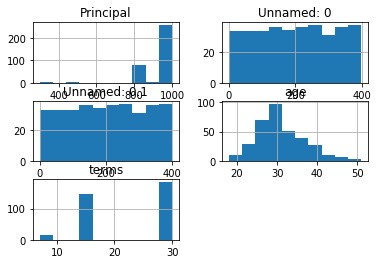

In [32]:
df.hist()

In [33]:
df['due_date']=pd.to_datetime(df['due_date'])
df['effective_date']=pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


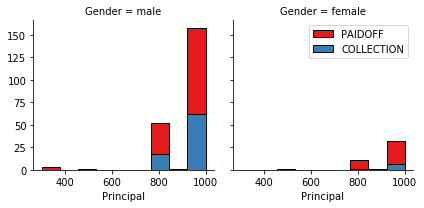

In [35]:
df['loan_status'].value_counts()
bins=np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

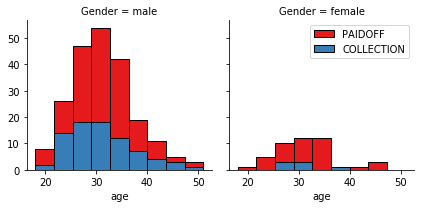

In [36]:
bins=np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

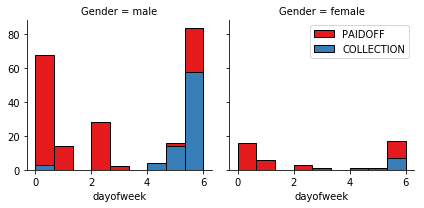

In [37]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins=np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [38]:
# according to hist define weekend as where the collection is higher that is everything from 4-6 (0=Monday;6=Sunday)
# banks open on Sundays ????
# weekend value will be used in the feature 
df['weekend']= df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


In [39]:
df.groupby(['Gender'])['loan_status'].value_counts()

Gender  loan_status
female  PAIDOFF         45
        COLLECTION       7
male    PAIDOFF        215
        COLLECTION      79
Name: loan_status, dtype: int64

In [41]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [42]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


In [43]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [44]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [45]:
pd.get_dummies(df['education']).head()

,Bechalor,High School or Below,Master or Above,college
0,0,1,0,0
1,1,0,0,0
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [46]:
#making a feature dataframe
Feature=df[['Principal','terms','age','Gender','weekend']]
Feature=pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)

Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [47]:
# rename columns in Feature to remove missspelling and upper case first charater
Feature.rename(columns={'Bechalor':'Bachelor', 'college':'College'},inplace=True)


In [48]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bachelor,High School or Below,College
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


In [49]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [50]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [51]:
# using KNN classification
#knn
# Use train_and_split function to split the data  in 80% train and 20% test
# note data is already : normalized, standardized
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [52]:
# Training and predict
# if not imported :
# from sklearn.neighbors import KNeighborsClassifier
# start with 5 neighbors
k = 7
# fit the model with the train data X_train and Y_train
nbr = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
nbr

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [53]:
# then predict with the test data X_test
yhatknn=nbr.predict(X_test)
yhatknn[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [54]:
# Accuracy using metrics function
print("Train set accuracy:  ",accuracy_score(y_train, nbr.predict(X_train)))
print("Test  set accuracy:  ",accuracy_score(y_test, yhatknn))
print("f1_score:            ",f1_score(y_test, yhatknn, average='weighted'))
print("Train set jaccard similarity:  ",jaccard_similarity_score(y_train,nbr.predict(X_train)))
print("Test  set jaccard similarity:  ",jaccard_similarity_score(y_test,yhatknn))

Train set accuracy:   0.807971014493
Test  set accuracy:   0.785714285714
f1_score:             0.776654024442
Train set jaccard similarity:   0.807971014493
Test  set jaccard similarity:   0.785714285714


In [55]:
# evaluate all values of K up to 20 and choose best
Kcount = 20
# Init the mean and standard accuracy numpy arrays with zeros
mean_accuracy = np.zeros((Kcount-1))
std_accuracy = np.zeros((Kcount-1))
# loop through using different values of K and train, fit model, predict and calculate standard and mean accuracy
for i in range(1,Kcount):
    #train + Fit model and predict 
    nbr = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat=nbr.predict(X_test)
    mean_accuracy[i-1] = metrics.accuracy_score(y_test, yhat)
    std_accuracy[i-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_accuracy

array([ 0.67142857,  0.65714286,  0.71428571,  0.68571429,  0.75714286,
        0.71428571,  0.78571429,  0.75714286,  0.75714286,  0.67142857,
        0.7       ,  0.72857143,  0.7       ,  0.7       ,  0.68571429,
        0.72857143,  0.72857143,  0.72857143,  0.7       ])

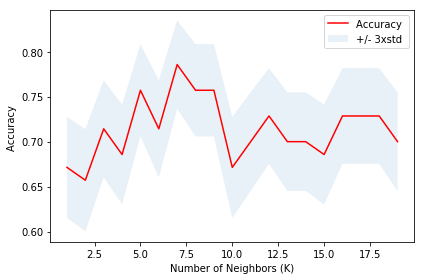

The best accuracy for this model is obtained with 0.785714285714 when k =  7


In [56]:
# plot the model accuracy to see how we can choose the best value K
plt.plot(range(1,Kcount),mean_accuracy,'r')
plt.fill_between(range(1,Kcount),mean_accuracy - 1 * std_accuracy,mean_accuracy + 1 * std_accuracy, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy for this model is obtained with", mean_accuracy.max(), "when k = ", mean_accuracy.argmax()+1) 

In [57]:
#confusion matrix:
y_actual=pd.Series(y_test, name='Actual')
y_predicted=pd.Series(yhatknn,name='Predicted')
k_cm=confusion_matrix(y_actual,y_predicted, labels=['COLLECTION','PAIDOFF'])
# normalized
k_cm_norm=k_cm/k_cm.sum(axis=1)
# unravel the values for tn,fp,fn,tp
mtx=k_cm.ravel()
# mtx=(tn,fp,fn,tp)
print(mtx)
print(k_cm)
print(k_cm_norm)

[ 6  9  6 49]
[[ 6  9]
 [ 6 49]]
[[ 0.4         0.16363636]
 [ 0.4         0.89090909]]


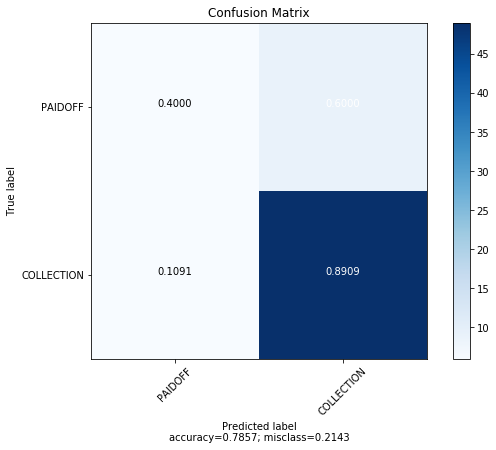

In [58]:
# class_list=['PAIDOFF','COLLECTED']
tnames=df["loan_status"].unique().tolist()
# plot_confusion_matrix(k_cm,target_names=tnames, normalize=False, title='Confusion Matrix')
plot_confusion_matrix(k_cm,target_names=tnames, normalize=True, title='Confusion Matrix')

In [59]:
# classification report k-NN
print (classification_report(y_test, yhatknn))

             precision    recall  f1-score   support

 COLLECTION       0.50      0.40      0.44        15
    PAIDOFF       0.84      0.89      0.87        55

avg / total       0.77      0.79      0.78        70



In [60]:
# final evaluations on train data for KNN
print("Test  set accuracy:            ",accuracy_score(y_test, yhatknn))
print("Test  set f1_score:            ",f1_score(y_test, yhatknn, average='weighted'))
print("Test  set jaccard similarity:  ",jaccard_similarity_score(y_test,yhatknn))

Test  set accuracy:             0.785714285714
Test  set f1_score:             0.776654024442
Test  set jaccard similarity:   0.785714285714


In [61]:
#Decsion tree:
# check data sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [62]:
dtc = DecisionTreeClassifier(criterion="entropy", max_depth = 8) # min_samples_leaf=30
dtc

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [63]:
dtc.fit(X_train,y_train)
yhatdtc=dtc.predict(X_test)
yhatdtc

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [64]:
# verification

print("Train set accuracy:            ",accuracy_score(y_train, dtc.predict(X_train)))
print("Test  set accuracy:            ",accuracy_score(y_test, yhatdtc))
print("Test  set f1_score:            ",f1_score(y_test, yhatdtc, average='weighted'))
print("Train set jaccard similarity:  ",jaccard_similarity_score(y_train,dtc.predict(X_train)))
print("Test  set jaccard similarity:  ",jaccard_similarity_score(y_test,yhatdtc))

Train set accuracy:             0.797101449275
Test  set accuracy:             0.757142857143
Test  set f1_score:             0.697881066302
Train set jaccard similarity:   0.797101449275
Test  set jaccard similarity:   0.757142857143


In [65]:
featureNames = ['Principal', 'terms', 'age', 'Gender', 'weekend', 'Bachelor', 'High School or Below', 'College']
targetNames = df["loan_status"].unique().tolist()

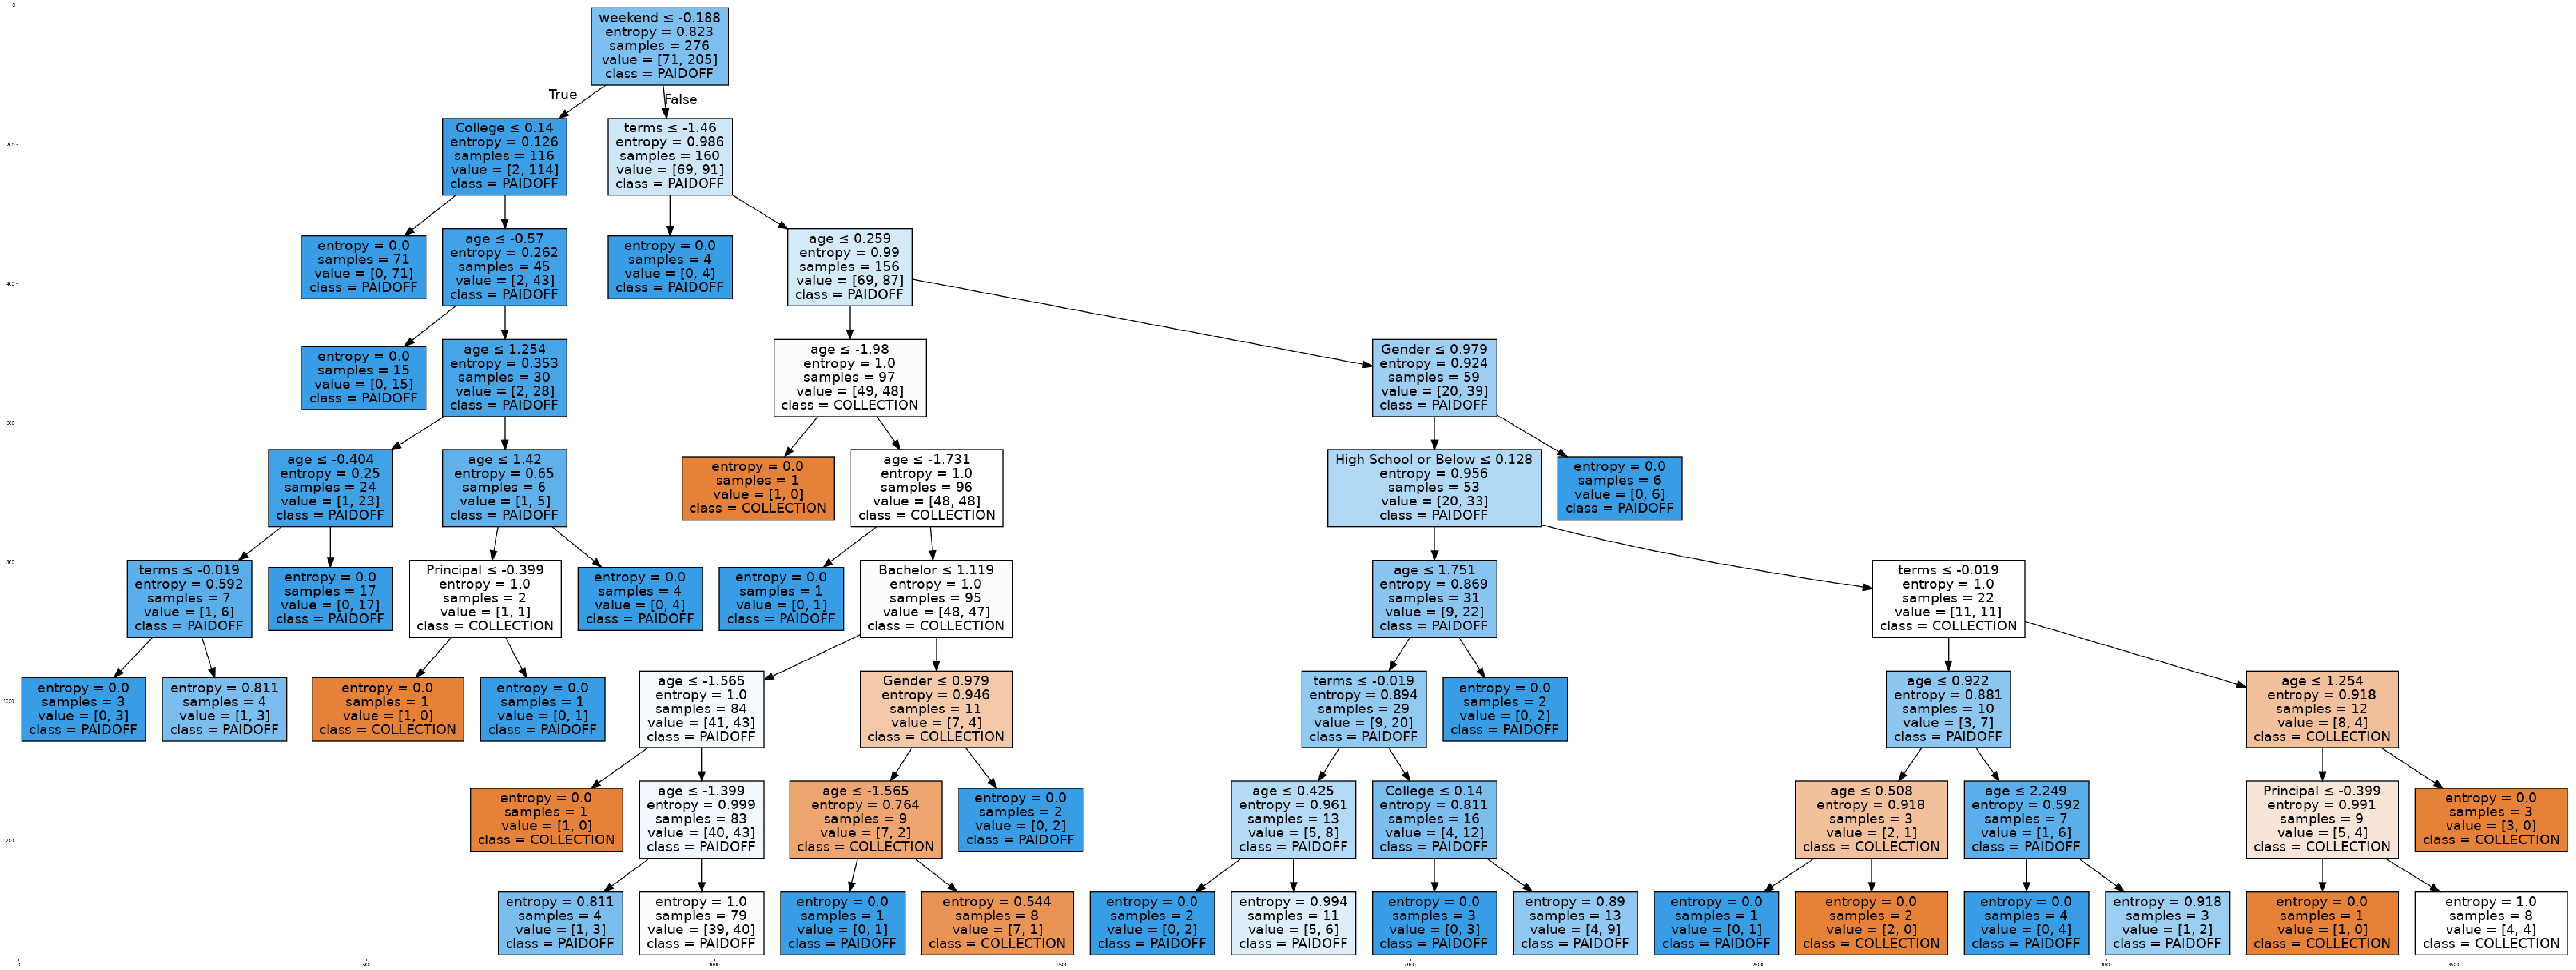

In [66]:
pydot_data = StringIO()
filename = "dtc_loan_status_train_and_test.png"
out=tree.export_graphviz(
            dtc
           ,feature_names=featureNames
           ,out_file=pydot_data
           ,class_names= np.unique(y_train)
           ,filled=True
           ,special_characters=True
           ,rotate=False)  
graph = pydotplus.graph_from_dot_data(pydot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

[ 1 14  3 52]
[[ 1 14]
 [ 3 52]]
[[ 0.06666667  0.25454545]
 [ 0.2         0.94545455]]


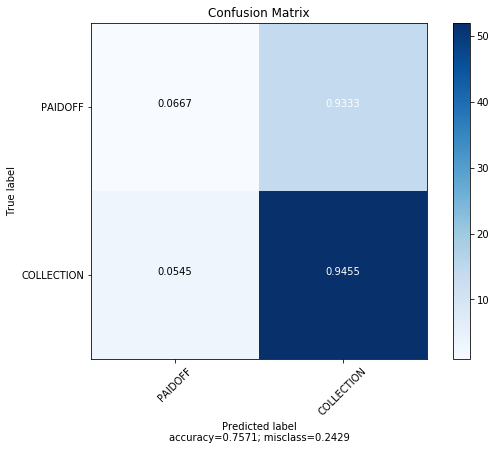

In [67]:
#confusion matrix
y_actual=pd.Series(y_test, name='Actual')
y_predicted=pd.Series(yhatdtc,name='Predicted')
dt_cm=confusion_matrix(y_actual,y_predicted, labels=['COLLECTION','PAIDOFF'])
# normalized
dt_cm_norm=dt_cm/dt_cm.sum(axis=1)
# unravel the values for tn,fp,fn,tp
mtx=dt_cm.ravel()
print(mtx)
print(dt_cm)
print(dt_cm_norm)
# tnames=['PAIDOFF','COLLECTION']
tnames=df["loan_status"].unique().tolist()
# plot_confusion_matrix(dt_cm,target_names=tnames, normalize=False, title='Confusion Matrix')
plot_confusion_matrix(dt_cm,target_names=tnames, normalize=True, title='Confusion Matrix')

In [68]:
# classification report Decision Tree
print (classification_report(y_test, yhatdtc))
# final evaluations on train data for Decision Tree
print("Test  set accuracy:            ",accuracy_score(y_test, yhatdtc))
print("Test  set f1_score:            ",f1_score(y_test, yhatdtc, average='weighted'))
print("Test  set jaccard similarity:  ",jaccard_similarity_score(y_test,yhatdtc))

             precision    recall  f1-score   support

 COLLECTION       0.25      0.07      0.11        15
    PAIDOFF       0.79      0.95      0.86        55

avg / total       0.67      0.76      0.70        70

Test  set accuracy:             0.757142857143
Test  set f1_score:             0.697881066302
Test  set jaccard similarity:   0.757142857143


In [69]:
#svm
# check data sets used up to now
print ('Train set - train :', X_train.shape, y_train.shape)
print ('Test set -  train :', X_test.shape, y_test.shape)


Train set - train : (276, 8) (276,)
Test set -  train : (70, 8) (70,)


In [70]:
sv1=svm.SVC(kernel='rbf').fit(X_train,y_train)
sv2=svm.SVC(kernel='linear').fit(X_train,y_train)
sv3=svm.SVC(kernel='sigmoid').fit(X_train,y_train)
sv4=svm.SVC(kernel='poly').fit(X_train,y_train)
yhatsvm1=sv1.predict(X_test)
yhatsvm2=sv2.predict(X_test)
yhatsvm3=sv3.predict(X_test)
yhatsvm4=sv4.predict(X_test)
yhatsvm1, yhatsvm2, yhatsvm3, yhatsvm4

(array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
        'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
        'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
        'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
        'COLLECTION', 'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF',
        'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
        'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
        'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
        'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
        'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
        'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
        'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object),
 array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
        'PA

[ 4 11  7 48]
[[ 4 11]
 [ 7 48]]
[[ 0.26666667  0.2       ]
 [ 0.46666667  0.87272727]]


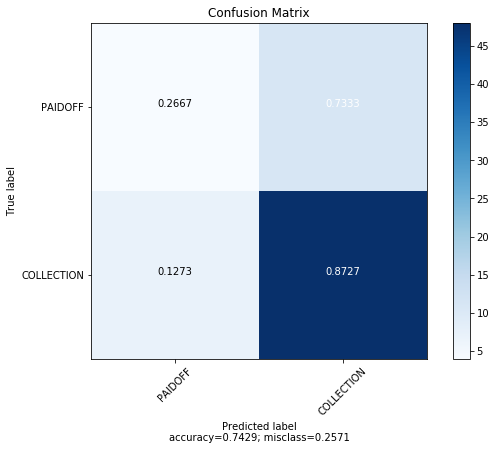

             precision    recall  f1-score   support

 COLLECTION       0.36      0.27      0.31        15
    PAIDOFF       0.81      0.87      0.84        55

avg / total       0.72      0.74      0.73        70



In [71]:
#confusion matrix
# use sv1 as kernel from this point on (others can be used with either a function or a loop through)
y_actual=pd.Series(y_test, name='Actual')
y_predicted=pd.Series(yhatsvm1,name='Predicted')
svm1_cm=confusion_matrix(y_actual,y_predicted, labels=['COLLECTION','PAIDOFF'])
# normalized
svm1_cm_norm=svm1_cm/svm1_cm.sum(axis=1)
# unravel the values for tn,fp,fn,tp
mtx=svm1_cm.ravel()
print(mtx)
print(svm1_cm)
print(svm1_cm_norm)
# tnames=['PAIDOFF','COLLECTION']
tnames=df["loan_status"].unique().tolist()
# plot_confusion_matrix(svm1_cm,target_names=tnames, normalize=False, title='Confusion Matrix')
plot_confusion_matrix(svm1_cm,target_names=tnames, normalize=True, title='Confusion Matrix')
# classification report Support Vector Machine SVM
print (classification_report(y_test, yhatsvm1))


In [72]:
# Final evaluations on train data for SVM
print("Test  set accuracy:            ",accuracy_score(y_test, yhatsvm1))
print("Test  set f1_score:            ",f1_score(y_test, yhatsvm1, average='weighted'))
print("Test  set jaccard similarity:  ",jaccard_similarity_score(y_test,yhatsvm1))


Test  set accuracy:             0.742857142857
Test  set f1_score:             0.727588201272
Test  set jaccard similarity:   0.742857142857


In [73]:
#logistic regression
# check data sets used up to now
print ('Train set - train :', X_train.shape, y_train.shape)
print ('Test set -  train :', X_test.shape, y_test.shape)
lrg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
lrg

Train set - train : (276, 8) (276,)
Test set -  train : (70, 8) (70,)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [74]:
# prediction with test set from training dataset
yhatlrg=lrg.predict(X_test)
problrg=lrg.predict_proba(X_test)
yhatlrg , problrg

(array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
        'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
        'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
        'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
        'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF',
        'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
        'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
        'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
        'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
        'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
        'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
        'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
        'PAIDOFF'], dtype=object), array([[ 0.5034238 ,  0.4965762 ],
        [ 0.45206111,  0.54793889],
      

In [75]:
# calculate log loss you need to caheck with probality wall predict..
log_loss(y_test, problrg)

0.57722876094796538

In [76]:
#confusion matrix
# use lrg as estimator
y_actual=pd.Series(y_test, name='Actual')
y_predicted=pd.Series(yhatlrg,name='Predicted')
lrg_cm=confusion_matrix(y_actual,y_predicted, labels=['COLLECTION','PAIDOFF'])

In [77]:
# normalized
lrg_cm_norm=lrg_cm/lrg_cm.sum(axis=1)
# unravel the values for tn,fp,fn,tp
mtx=lrg_cm.ravel()
print(mtx)
print(lrg_cm)
print(lrg_cm_norm)

[ 2 13  9 46]
[[ 2 13]
 [ 9 46]]
[[ 0.13333333  0.23636364]
 [ 0.6         0.83636364]]


In [78]:
# classification report Logistic Regression
print (classification_report(y_test, yhatlrg))
# Final evaluations on train data for Logistic Regression
print("Test  set accuracy:            ",accuracy_score(y_test, yhatlrg))
print("Test  set f1_score:            ",f1_score(y_test, yhatlrg, average='weighted'))
print("Test  set jaccard similarity:  ",jaccard_similarity_score(y_test,yhatlrg))
print("Test  set log loss          :  ",log_loss(y_test,problrg))

             precision    recall  f1-score   support

 COLLECTION       0.18      0.13      0.15        15
    PAIDOFF       0.78      0.84      0.81        55

avg / total       0.65      0.69      0.67        70

Test  set accuracy:             0.685714285714
Test  set f1_score:             0.667052246
Test  set jaccard similarity:   0.685714285714
Test  set log loss          :   0.577228760948


In [79]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
dft = pd.read_csv('loan_test.csv')
dft.head()

--2019-02-03 16:25:23--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-02-03 16:25:23 (750 MB/s) - ‘loan_test.csv’ saved [3642/3642]



,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [80]:
# set up the bins based on principal min() and max() values with 10 bins
bins=np.linspace(dft.Principal.min(),dft.Principal.max(),10)

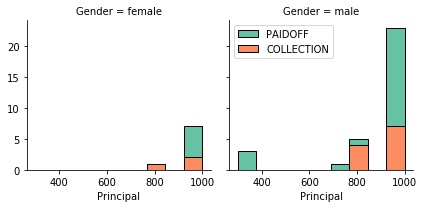

In [81]:
# plot by gender with FaceGrid function
g=sns.FacetGrid(dft, col='Gender', hue='loan_status', palette='Set2', col_wrap=2)
g.map(plt.hist,'Principal',bins=bins,ec='k')
g.axes[-1].legend()
plt.show()

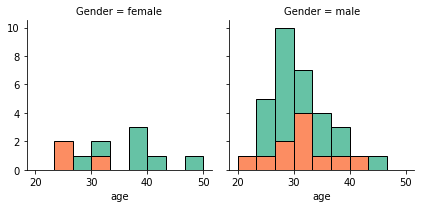

In [82]:
# set up the bins based on age min() and max() values with 10 bins
bins=np.linspace(dft.age.min(),dft.age.max(),10)
# plot by age and gender with hue on loan_status with FaceGrid function
a=sns.FacetGrid(dft,col='Gender',hue='loan_status',palette='Set2',col_wrap=2)
a.map(plt.hist,'age',bins=bins,ec='k')
g.axes[-1].legend()
plt.show()

In [83]:
# check the type of the effective_date values
type(dft.effective_date.values[1])

str

In [84]:
# convert the effective_date column values to dates
dft['effective_date']=pd.to_datetime(dft['effective_date'])
dft['effective_date'].head(3)
type(dft.effective_date.values[1])

numpy.datetime64

In [85]:
# compute the dayofweek
dft['dayofweek']=dft['effective_date'].dt.dayofweek
dft['dayofweek'].head(3)

0    3
1    4
2    5
Name: dayofweek, dtype: int64

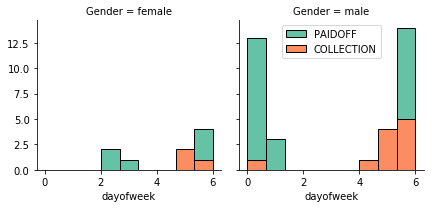

In [86]:
# plot by dayofweek and gender with hue on loan_status with FaceGrid function
bins=np.linspace(dft.dayofweek.min(),dft.dayofweek.max(),10)
d=sns.FacetGrid(dft,col='Gender',hue='loan_status',palette='Set2',col_wrap=2)
d.map(plt.hist,'dayofweek',bins=bins,ec='k')
d.axes[-1].legend()
plt.show()

In [87]:
# establish what means weekend
dft['weekend']=dft['dayofweek'].apply(lambda x: 1 if (x>3) else 0)

In [88]:
# turn male/female to numerical values
dft['Gender'].replace(to_replace=['male','female'], value=[0,1], inplace=True)

In [89]:
# feature extraction and selections
ftr=dft[['Principal','terms','age','Gender','weekend']]
ftr=pd.concat([ftr,pd.get_dummies(dft['education'])], axis=1)

In [90]:
# drop master and above
ftr.drop(columns='Master or Above', axis = 1,inplace=True)

In [91]:
# rename ed columns 
ftr.rename(columns={'Bechalor':'Bachelor', 'college':'College'},inplace=True)
ftr.head()

,Principal,terms,age,Gender,weekend,Bachelor,High School or Below,College
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [92]:
# define feature set and the labels based on test data from loan_test.csv
X1=preprocessing.StandardScaler().fit(ftr).transform(ftr)
y1=dft['loan_status'].values
y1

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION'], dtype=object)

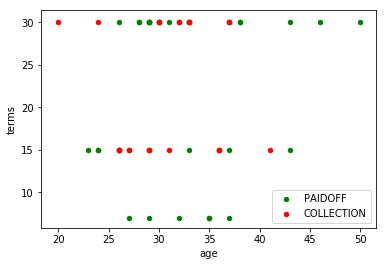

In [94]:
# take another view on the data
ax = dft[dft['loan_status'] == 'PAIDOFF'][0:50].plot(
                             kind='scatter'
                            ,x='age'
                            ,y='terms'
                            ,color='Green'
                            ,label='PAIDOFF');
dft[dft['loan_status'] == 'COLLECTION'][0:50].plot(
                             kind='scatter'
                            ,x='age'
                            ,y='terms'
                            ,color='Red'
                            ,label='COLLECTION'
                            ,ax=ax);
plt.show()

In [95]:
#knn
# check data sets used up to now
print ('Train set - train :', X_train.shape, y_train.shape, y1.shape)
print ('Test set -  train :', X_test.shape, y_test.shape, y1.shape)
print ('Test set -  final :', X1.shape,  y1.shape)
# use the model trained and tested with loan_train.csv to predict targets from loan_test.csv
yhat1 = nbr.predict(X1)
# get the KNN metrics
# accuracy
kacc = accuracy_score(y1, yhat1)
# f1-score
kf1=f1_score(y1, yhat1, average='weighted')
kacc, kf1

Train set - train : (276, 8) (276,) (54,)
Test set -  train : (70, 8) (70,) (54,)
Test set -  final : (54, 8) (54,)


(0.7407407407407407, 0.71443113303578432)

In [96]:
#tree
# check data sets
print ('Train set - train :', X_train.shape, y_train.shape, y1.shape)
print ('Test set -  train :', X_test.shape, y_test.shape, y1.shape)
print ('Test set -  final :', X1.shape,  y1.shape)
# use the model trained and tested with loan_train.csv to predict targets from loan_test.csv
yhat2=dtc.predict(X1)
# get the Decision Tree metrics
# accuracy
dtacc = accuracy_score(y1, yhat2)
# f1-score
dtf1=f1_score(y1, yhat2, average='weighted')
dtacc, dtf1

Train set - train : (276, 8) (276,) (54,)
Test set -  train : (70, 8) (70,) (54,)
Test set -  final : (54, 8) (54,)


(0.7407407407407407, 0.70067340067340078)

In [98]:
#svm
# check data sets
print ('Train set - train :', X_train.shape, y_train.shape, y1.shape)
print ('Test set -  train :', X_test.shape, y_test.shape, y1.shape)
print ('Test set -  final :', X1.shape,  y1.shape)
# use the model trained and tested with loan_train.csv to predict targets from loan_test.csv
yhat3=sv1.predict(X1)
# get the SVM metrics
# accuracy
svmacc = accuracy_score(y1, yhat3)
# f1-score
svmf1=f1_score(y1, yhat3, average='weighted')
svmacc, svmf1

Train set - train : (276, 8) (276,) (54,)
Test set -  train : (70, 8) (70,) (54,)
Test set -  final : (54, 8) (54,)


(0.79629629629629628, 0.7583503077293734)

In [99]:
#Logistic regression
# check data sets
print ('Train set - train :', X_train.shape, y_train.shape, y1.shape)
# use the model trained and tested with loan_train.csv to predict targets from loan_test.csv
yhat4=lrg.predict(X1)
prblr=lrg.predict_proba(X1)
yhat4 , prblr
# get the Logistic Regression metrics
# accuracy
lrgacc = accuracy_score(y1, yhat4)
# f1-score
lrgf1=f1_score(y1, yhat4, average='weighted')
# log loss
lrglgl=log_loss(y1, prblr)
lrgacc, lrgf1, lrglgl

Train set - train : (276, 8) (276,) (54,)


(0.7407407407407407, 0.66042673107890493, 0.56721533799129809)

In [101]:
# initialize empty report
dict={'Algorithm':['KNN','Decision Tree','SVM','Logistic Regression'],'Jaccard':['?','?','?','?'],'F1-score':['?','?','?','?'],'LogLoss':['NA','NA','NA','?']}
rpt=pd.DataFrame.from_dict(dict)
rpt.head()

,Algorithm,F1-score,Jaccard,LogLoss
0,KNN,?,?,NA
1,Decision Tree,?,?,NA
2,SVM,?,?,NA
3,Logistic Regression,?,?,?


In [102]:
# KNN : update report with Jaccard mean_accuracy
rpt.iloc[0,1]=kacc
# KNN : update report with f1 score
rpt.iloc[0,2]=kf1
# Decision tree: update report with Jaccard mean_accuracy
rpt.iloc[1,1]=dtacc
# Decision tree : update report with f1 score
rpt.iloc[1,2]=dtf1
# SVM : update report with Jaccard mean_accuracy
rpt.iloc[2,1]=svmacc
# SVM : update report with f1 score
rpt.iloc[2,2]=svmf1
# Logistic Regression : update report with Jaccard mean_accuracy
rpt.iloc[3,1]=lrgacc
# Logistic Regression : update report with f1 score
rpt.iloc[3,2]=lrgf1
# Logistic Regression : update report with log loss
rpt.iloc[3,3]=lrglgl
rpt

,Algorithm,F1-score,Jaccard,LogLoss
0,KNN,0.740741,0.714431,NA
1,Decision Tree,0.740741,0.700673,NA
2,SVM,0.796296,0.75835,NA
3,Logistic Regression,0.740741,0.660427,0.567215


In [103]:
print ('Test set -  train :', X_test.shape, y_test.shape, y1.shape)
print ('Test set -  final :', X1.shape,  y1.shape)

Test set -  train : (70, 8) (70,) (54,)
Test set -  final : (54, 8) (54,)
